<a href="https://colab.research.google.com/github/MerkulovDaniil/nn_visualization/blob/main/neural_architecture/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nn_viz.PlaneLayer import *
from nn_viz.neural_net import NN

In [ ]:


nn = NN()

# Encoder
nn.add(Conv2D())
nn.add(Conv2D())
nn.add(Pooling(pool_size=3))

nn.add(Conv2D())
nn.add(Conv2D())
nn.add(Pooling(pool_size=2))

nn.add(Conv2D())
nn.add(Conv2D())
nn.add(Conv2D())
nn.add(Pooling(pool_size=2))

# Decoder
nn.add(Upsampling(factor=2))
nn.add(Conv2D())
nn.add(Conv2D())
nn.add(Conv2D())

nn.add(Upsampling(factor=2))
nn.add(Conv2D())
nn.add(Conv2D())

nn.add(Upsampling(factor=2))
nn.add(Conv2D())
nn.add(Conv2D())

nn.add(Conv2D())

/content/nn_viz/PlaneLayer.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


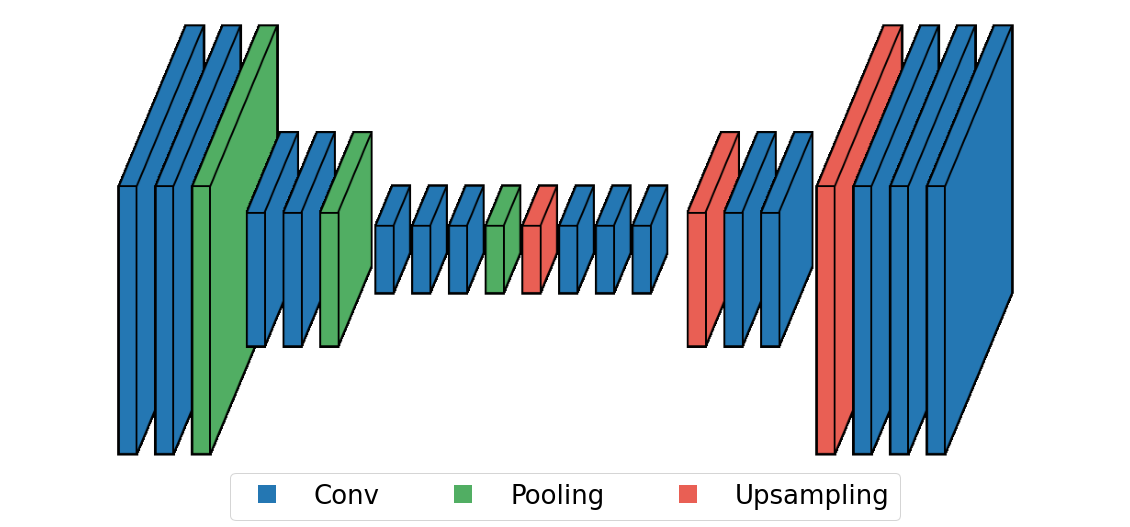

In [ ]:
nn.compile()
nn.add_legend(bbox_to_anchor=(0.2, -0.1, 0.6, 0.1), fontsize=26)
nn.draw(save=True, save_path='content.svg')

In [ ]:
# Ideal workflow
import torch
import torch.nn as nn
import torch.nn.functional as F
import nn_viz
from nn_viz.utils import draw_torch

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

draw_torch(net, (1,32,32))

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


AttributeError: ignored

In [ ]:
!pip install torchsummary 

In [ ]:
from nn_viz.utils import summary
summary(net, input_size=(1,32,32), device=torch.device('cpu'))
hui = summary(net, input_size=(1,32,32), device=torch.device('cpu'), return_dict = True)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 30, 30]              60
            Conv2d-2           [-1, 16, 13, 13]             880
            Linear-3                  [-1, 120]          69,240
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
               Net-6                   [-1, 10]               0
Total params: 81,194
Trainable params: 81,194
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.31
Estimated Total Size (MB): 0.38
----------------------------------------------------------------



In [ ]:
for layer in hui.items():
    print(layer[0].split('-')[0])

Conv2d
Conv2d
Linear
Linear
Linear
Net
